## Fitting grades example: Does the linear regression depend on which variable we choose to assign to the x-axis (independent variable) and the y-axis (dependent variable)?

In this notebook we use the two data arrays x and y that contain the sample data:

* x contains the third exam score
* y contains the final exam score 

In [3]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
import numpy as np
from scipy import stats

x=np.array([ 65, 67, 71, 71, 66, 75, 67, 70, 71, 69, 69])
y=np.array([175,133,185,163,126,198,153,163,159,151,159])

# center data
x=x-np.mean(x)
y=y-np.mean(y)

## Linear regression with scipy package
It can be done with scipy's stats.linregress function.

### (1) Third grade exam scores as independent variable and final exam score as dependent variable

In [3]:
#stats.linregress(x,y)
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x,y)
print("final score= %8.2f + %8.2f * third exam score" %(intercept1, slope1))
print("correlation: %5.2f" % (r_value1))
print("p-value: %8.6f" %(p_value1))


final score=     0.00 +     4.83 * third exam score
correlation:  0.66
p-value: 0.026150


In [4]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(y,x)
print("third exam score = %8.2f + %8.2f * final exam score" %(intercept2, slope2))
print("correlation: %5.2f" % (r_value2))
print("p-value: %8.6f" %(p_value2))


print ("testing the slope product b1*b2= ", slope1*slope2)

third exam score =    -0.00 +     0.09 * final exam score
correlation:  0.66
p-value: 0.026150
testing the slope product b1*b2=  0.4396931104246355


## Create a scatterplot with the regression lines

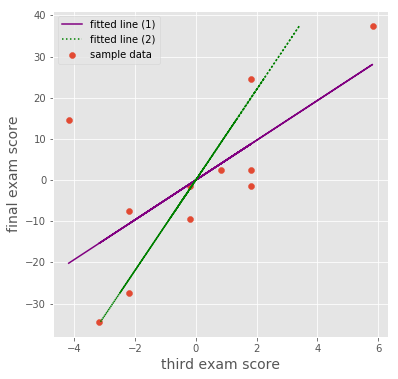

In [6]:
# Change the default plot style
# You can see what styles are available with print(plt.style.available)
plt.style.use("ggplot")
plt.figure(figsize=(6,6))
# create scatter plot
plt.scatter(x,y,label='sample data')
plt.xlabel("third exam score",fontsize=14)
plt.ylabel("final exam score",fontsize=14)
yhat1=slope1*x

xhat2=slope2*y
# get the fitted line y-values for each x value
plt.plot(x,yhat1,color='purple',label='fitted line (1)') 
plt.plot(xhat2,y,':',color='green',label='fitted line (2)')
plt.legend()
plt.show()


## Summary

In linear regression we have to pay attention to the role of the two variables. The slope of the fitted regression line is given by the ratio of the standard deviations in the two samples multiplied with the correlation coefficient:

A fitted line for the situation 

$y=a + b\,x +\epsilon_1$ 

is given by

$\large \hat{b}= r\,\frac{s_y}{s_x}$

with $r$ the correlation coefficient, $s_x$ the standard deviation in the independent variable, and $s_y$ the standard deviation in the dependent variable.

If we switched the role of the variables 

$x=c + d\,y +\epsilon_2$

we fit another line with the slope:

$\large \hat{d}=r\, \frac{s_x}{s_y}$


In many situations, but not always, the nature of the problem will guide us in deciding what is the independent variable and which variable is the dependent variable. 



---
Note: if invert the slope of this second fitted line we get: 

$\large \frac{1}{\hat{d}} = \frac{1}{r} * \frac{s_y}{s_x} = \frac{r}{r^2} \frac{s_y}{s_x} = \frac{1}{r^2} \hat{b}$

Or equivalently: $ \hat{b}*\hat{d} = r^2$
This shows us that the sum of squared errors principle gives different fitted lines when we plot the two lines in the same scatter plot. Only when the correlation approaches values close to 1 will the slopes will be reciprocal to each other.
